In [153]:
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from scipy import stats as scipy
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [2]:
data = pd.read_csv('DataSets/weight-height.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Sexo      10000 non-null object
Altura    10000 non-null float64
Peso      10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [5]:
data.columns = ['Sexo', 'Altura', 'Peso']

In [7]:
#Converter de pol para cm
data['Altura_cm'] = data['Altura']*2.54

#Converter de libra para kg
data['Peso_kg'] = data['Peso']*0.453592

In [27]:
#Gerar 200 médias amostrais de 50 amostras
medias_amostrais = []
for _ in range(200):
    media = data['Peso_kg'].sample(n=50).mean()
    medias_amostrais.append(media)

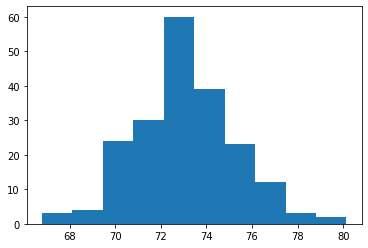

In [28]:
plt.hist(medias_amostrais)
plt.show()

In [29]:
#Gerar 200 médias amostrais de 50 amostras
medias_amostrais = []
for _ in range(200):
    media = data['Peso'].sample(n=50).mean()
    medias_amostrais.append(media)

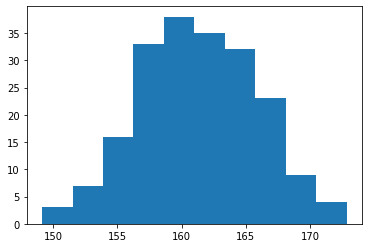

In [30]:
plt.hist(medias_amostrais)
plt.show()

## Regressão Linear

In [61]:
faturamento = [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175]

In [62]:
mes = list(range(1,13))

In [63]:
data_dict = {'mes': mes, 'faturamento': faturamento}

In [64]:
data_dict

{'mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'faturamento': [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175]}

In [65]:
data = pd.DataFrame.from_dict(data_dict)

In [66]:
data.head()

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82


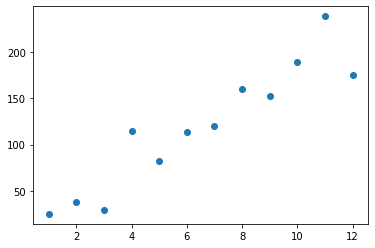

In [94]:
plt.scatter(x=data['mes'], y=data['faturamento'])
plt.show()

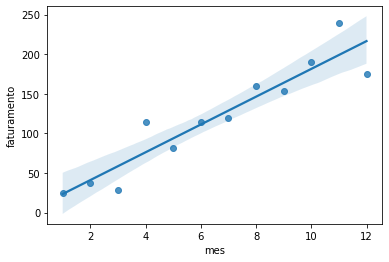

In [93]:
sns.regplot(x=data['mes'], y=data['faturamento'])
plt.show()

In [69]:
data.corr()

,mes,faturamento
mes,1.000000,0.935045
faturamento,0.935045,1.000000


In [145]:
#Equação da Regressão Linear na unha
x = data['mes']
y = data['faturamento']
n = len(data['mes'])

m = ((n * sum(x*y)) - (x.sum() * y.sum())) / (n * sum(x**2) - (sum(x)**2))

b = (y.sum() - (m * x.sum())) / n


In [79]:
#Predicao para o mes xpred
xpred = 13
ypred = m*xpred + b
ypred

234.0

In [80]:
pred_manual = []
for elemento in x:
    ypred = m*elemento+b
    pred_manual.append(ypred)

In [81]:
data['predicao'] = pred_manual

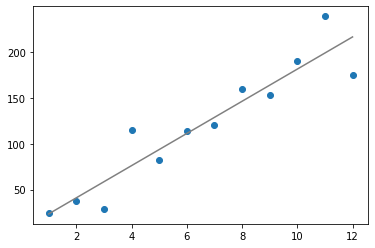

In [96]:
plt.scatter(x=data['mes'], y=data['faturamento'])
plt.plot(data['mes'],data['predicao'], color='grey')
plt.show()

In [112]:
#Coeficiente de Determinação - R-quadrado(R²)
data['residuos'] = data['faturamento'] - data['predicao']
data['media_faturamento'] = data['faturamento'].mean()
SQres = (data['residuos']**2).sum()
SQtot = ((data['faturamento'] - data['media_faturamento'])**2).sum()
r_quadrado = 1-SQres/SQtot
r_quadrado

0.8743085179578918

In [117]:
#Raiz do Erro Quadrático Médio
#rmse = math.sqrt((data['residuos']**2/n).sum())
rmse = np.sqrt((SQres/n).sum())
rmse

22.95564284574794

In [121]:
#Desvio padrão para aplicar Regra Empírica 68 - 95 - 99.7
um_acima = data['predicao']+rmse
um_abaixo = data['predicao']-rmse
dois_acima = data['predicao']+2*rmse
dois_abaixo = data['predicao']-2*rmse
tres_acima = data['predicao']+3*rmse
tres_abaixo = data['predicao']-3*rmse

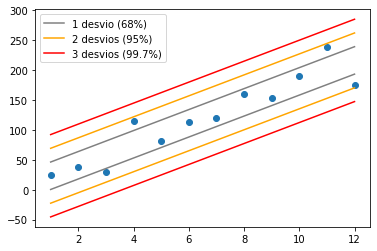

In [140]:
fig, ax = plt.subplots()
ax.scatter(data['mes'], data['faturamento'])
line1 = ax.plot(x, um_acima, color='grey', label='1 desvio (68%)')
line2 = ax.plot(x, um_abaixo, color='grey')
line3 = ax.plot(x, dois_acima, color='orange', label='2 desvios (95%)')
line4 = ax.plot(x, dois_abaixo, color='orange')
line5 = ax.plot(x, tres_acima, color='red', label='3 desvios (99.7%)')
line6 = ax.plot(x, tres_abaixo, color='red')
ax.legend()
plt.show()

## Regressão Linear com Statsmodels

In [147]:
#Definir x, y da função
x = data['mes']
y = data['faturamento']

#Adicionar constante ao x
x = sm.add_constant(x.values)

In [148]:
x

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

In [149]:
#Ajustar modelo(OLS - Mínimos Quadrados Ordinários) aos dados 
modelo = sm.OLS(y,x).fit()

In [151]:
#Gerar predição do modelo
sm_pred = modelo.predict()
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [152]:
modelo.summary()

/usr/lib64/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           8.16e-06
Time:                        18:26:48   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
rmse(y,sm_pred)

22.955642845747942